# Machine Learning Exercise - Univariate and Multivariate Linear Regression


Hey there, hi there, ho there, dear reader! Today, Andrew Ng's machine learning class (https://www.coursera.org/learn/machine-learning) has tasked us with implementing univariate and multivariate linear regression for a couple different data sets. Linear regression basically means trying to draw the best possible line we can, where the "best line" just means a line that is as close as possible to all the data. In this notebook, I try to explain the logic, the math, and the code in detail, so I hope you find it helpful. 


Recommended python tutorial for machine learning:
http://cs231n.github.io/python-numpy-tutorial/#numpy-arrays

This notebook was inspired by http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/. Check out his webpage if you're interesting in machine learning or data science.

## Univariate linear regression

Who's hungry? I ask because Andrew Ng wants us to suppose we are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and we have data for profits and populations from the cities. We want to use this data to select which city to expand to next. The data is contained in the file ex1data1.txt The first column is population in thousands of people and the second is profit in thousands of dollars.


Let's start by importing some libraries and examining the data.
Numpy will be used for math and data manipulation stuff and we will call it 'np'. So, when we want to use numpy, we'll just say 'np'.
Pandas will be used for data manipulation and preprocessing (pre-machine learning data wrangling) and we will call it 'pd'.
matplotlib has function called 'pyplot' which we will use for the plotting of figures and we will call it 'plt'.
The reason we use only part of matplotlib is because we don't need the whole library. 
Importing the whole library is bad coding practice because it loads too much into memory, creates dependencies we may
be unaware of, and gives us access to functions we may not need/want/be aware of.

In [572]:
#####################################
#UNIVARIATE LINEAR REGRESSION
#####################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [573]:
#this code assumes the text file is in the same directory as the code file
#read in the data, create a panda's dataframe, and view the top and bottom
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [574]:
data.tail()

,Population,Profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [575]:
#summary statistics
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Those are some numbers all right! An important thing to note that we have 97  different rows or training examples. That is the value 'm', which will be important a little later on.

Let's visualize the data with a machine learning favorite-the scatterplot- and see how much trouble we're in.

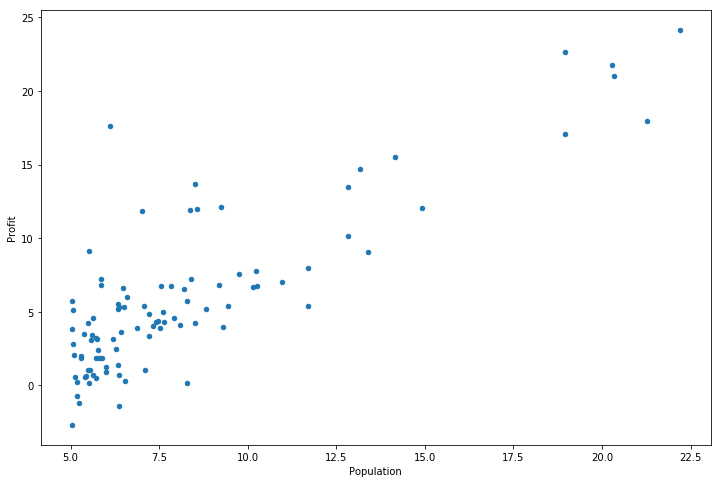

In [576]:
#initial scatter plot
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Now, let's put the data into something that's a bit more comfortable. We need to insert a columns of ones for the bias or intercept term. This term is important for a lot of reasons, but primary among them are: 1) the bias or intercept term does not restrict our model to passing through the origin and 2) we want to use a vectorized apporach. Vectorization is essential in machine learning because it's faster than using for-loops to do computation and the code is easier to read... if you think linear algebra is easy to read... anyway

In [577]:
#add our column of ones
data.insert(0, 'Ones', 1)

In [578]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Let's access the columns of our data using .shape[1] so our approach is automatic or dynamic instead of hard coding the values in. This is important in coding because if the data changed, say for example, we get a new data file, we would not have to rewrite code to perform essentially the same job just with different data.

Dear reader, for your information, .shape[0] would access our rows because Python indexes from 0.

In [615]:
cols = data.shape[1]

In [616]:
cols

3

Time to create our X matrix and y vector variables. We can use python slicing and iloc which is a panda's method for indexing integers from a panda's dataframe. For an indepth explanation, see the third answer: https://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation 

Let's use iloc from pandas and python slicing to access the first two columns of our data and create the matrix X. Then we can do the same thing for the last column to create the vector y.

In [581]:
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [582]:
X.head(), X.shape

(   Ones  Population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598, (97, 2))

In [583]:
y.head(), y.shape

(    Profit
 0  17.5920
 1   9.1302
 2  13.6620
 3  11.8540
 4   6.8233, (97, 1))

As you can see, X is now a 97 by 2 matrix while y is a 97 by 1 column vector full of the values we want to predict.

Now, let's check out numpy and see that we can do essentially the same things there as well!

In [584]:
#read in data using numpy
np_data = np.loadtxt('ex1data1.txt', delimiter=',')

X = np.c_[np.ones(np_data.shape[0]), np_data[:,0]]
y = np.c_[np_data[:,1]]


#confirm shape of variable objects, our matrices
X.shape, y.shape, y.size

((97, 2), (97, 1), 97)

Cool! We can look directly at the data too, though there is so much it's a bit overwhelming.

In [585]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [586]:
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

Sorry to spam you...
Anyway, now we can code up our cost function denoted by J. For linear regression we use what is called the squared error/cost/loss function defined below as:
#### $$ {J(\theta)} = \frac{1}{2m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})^2 $$
where h is the linear model defined by: $$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... +  \theta_n x_n $$


In the above equations, theta is what is called our parameter vector. The parameters of our models are simply numbers we multiply the values of our X matrix by to try and predict y. By changing these parameters (also called weights) we can improve (or worsen) how well we predict y. The cost function J takes theta's values, plugs them into our hypothesis function, h, and measures the difference between what our model predicts for a given x, xi, and a given y, yi. We then square this difference to remove any negative values and sum up all the differences for all our data points, the total number of data points is denoted by m. We multiply this value by 1/2 then, just to make the math a little easier when we start taking derivatives. n in the definition of h is the number of features and therefore parameters in the model.

We then use J to evalute values we might choose for theta, our parameter vector.

Typical practice is to intialize theta as a vector full of zeros whose element number is given by the column number (the number of features) of our matrix X. In other words, what would our cost be if theta was just full of zeros?

Let's code it up! We can start by creating a function, a group of code we plan to use later, and pass it X and y. We should also set up a default theta which will be a vector with dimensionality equivalent to the number of columns X has. We can automatically obtain m by accessing the size of y. h can be created by recognizing that theta transpose X is just the dot product, which numpy is happy to calculate for us. The calculation of J then follows from squaring the difference between h and y, summing that up over all of data, and multiplying that by 1/2m. We then tell the function to return J, which by the end of all that math is just a number.


In [617]:
def computeCost(X, y, theta = [[0]] * X.shape[1]):      
      
    m = y.size
    
    h = X.dot(theta)
    
    J = 1/ (2 * m) * np.sum(np.square(h - y))
    
    return J

So we can now evalute the guess of theta just being 0 using the our cost function J.

In [588]:
computeCost(X, y)

32.072733877455676

Not good! That is a huge cost meaning our current guess is just pathetic. That means we need to change the values of theta. But how can we do that? Let's use gradient descent.

#### Gradient Descent

#####  repeat until convergence {
#### $$ \theta_{j} := \theta_{j} - \alpha\frac{\partial J(\theta)}{\partial\theta_{j}} $$
##### }

#### where $$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$

In the above equations, the upside down e thing is the partial derivative of our cost function J with respect to theta j, that is, just some given theta. If you don't trust me, you can find an indepth derivation of how I arrived at this definition of the partial derivative in this repo.  Alpha is what is known as the learning rate, which is just a constant number we multiply the derivative term by to either speed up or slow down how quickly we're walking down the slope of our function. h is our hypothesis which is defined above.

If you're unfamiliar with calculus, a derivative is the slope of a nonlinear function which our cost function happens to be. By using gradient descent we are harnessing the partial derivatives of J to guide us toward our cost function's global minimum. So, we just keep doing the math above until we reach this minimum. Luckily for us, our cost function happens to be a convex function, so the minimum will be the global minimum rather than some local minimum.

Now with the math out of the way, we can set up the alpha value we want to use and the number of times we will repeat gradient descent. Andrew Ng suggests the following:

In [589]:
alpha = 0.01
iters = 1500

Bangarang! Now we just need to code up a function to perform gradient descent on the parameters theta using our update equation. We will pass this function X, y, alpha (the learning rate), and iters (iterations). Iterations is the number of times we will perform gradient descent on the data. For your information, dear reader, we will generate theta automatically based on the number of columns the matrix X has. X could change, so we want the program to adapt to this change automatically. To make our implementation as efficient as possible, we will use a vectorized approach and avoid for-loops like the plague. 

We will also set up a variable cost to store the values of our cost function on each pass of gradient descent we perform. By doing this and storing these values based on the iteration number, we can then see if and how gradient descent is reducing our cost function, J.

Unfortunately, dear reader, there is a for-loop below because I can think of no way of iterating over the data multiple times WITHOUT using some explicit for-loop. If you know of one, please let me know and collect your PhD in computer science cause you must be some kind of genius.

After exiting the for-loop, our function will return our updated parameter values-theta- and the variable cost, which is just an array of all the different values our cost function computied during gradient descent.

In [590]:
def gradientDescent(X, y, alpha, iters):
    
    theta = [[0]] * X.shape[1]
   
    m = y.size
    cost = np.zeros(iters)
    
    for i in np.arange(iters):
        h = np.dot(X, theta)
        theta = theta - alpha * (1 / m) * (X.T.dot(h - y))
        cost[i] = computeCost(X, y, theta)
    return theta, cost

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.
new_theta is the updated theta values returned by our gradient descent function.
cost is an array of our cost function values as they descreased with each iteration.

In [591]:
new_theta, cost = gradientDescent(X, y, alpha, iters)

In [592]:
new_theta, new_theta.shape

(array([[-3.63029144],
        [ 1.16636235]]), (2, 1))

In [593]:
cost

array([6.73719046, 5.93159357, 5.90115471, ..., 4.48343473, 4.48341145,
       4.48338826])

Finally we can compute the cost (or the loss or the error) of the trained model using our fitted parameters.

In [594]:
computeCost(X, y, new_theta)

4.483388256587725

Now let's plot our linear model along with the data to visually see how well it fits.

To draw our line, we use linspace to generate 100 linerally spaced values over our x interval. 

Remember that python indexes from 0. 

y = mx + b  or in this case y = b + mx.

new_theta[0, 0] is the bias term, theta_0. 

new_theta[0, 1] is the slope, theta_1.

In [595]:
x_line = np.linspace(data.Population.min(), data.Population.max(), 100)
y_line = new_theta.T[0, 0] + (new_theta.T[0, 1] * x_line)

Finally we can draw our line! Let's also compare our fit with Scikit-learn's (SL) implementation of linear regression. SL sets up the bias or intercept term by themselves, so we will exclude our columns of 1s when we pass SL's function the matrix X. We will use .ravel() to essentially transform y from a column vector into an array to make SL happy. Then we will just access their bias term and slope and compare it to ours, multiplying both by the same x interval.

#### Plotting note:
plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
Having fig is useful if you want to change figure-level attributes or save the figure as an 
image file later (e.g. with fig.savefig('yourfilename.png'). 
You certainly don't have to use the returned figure object but many people do use it later so 
it's common to see. 
Also, all axes objects (the objects that have plotting methods (functions that are members of a class)), 
have a parent figure object anyway, thus:

fig, ax = plt.subplots()
is more concise than this:

fig = plt.figure()

ax = fig.add_subplot(111)

111 means 1x1 grid, first subplot

Text(0.5,1,'Predicted Profit vs. Population Size')

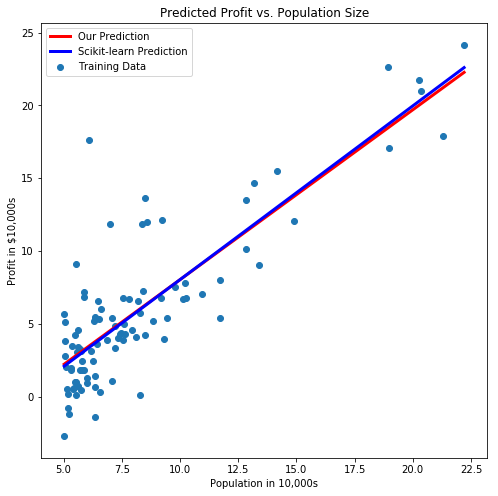

In [596]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X[:,1].reshape(-1, 1), y.ravel())
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x_line, y_line, 'r', linewidth=3.0, label='Our Prediction')
ax.plot(x_line, lr.intercept_+ lr.coef_* x_line, 'b', linewidth = 3.0, label = 'Scikit-learn Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc = 2)
ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')

Almost identical! How cool is that? Too legit! 
Since our gradient descent function also outputs an array of the cost function's value at each training iteration, we can plot that as well to see our cost function decrease as we descend the gradient.

Text(0.5,1,'Error descreasing with iteration number')

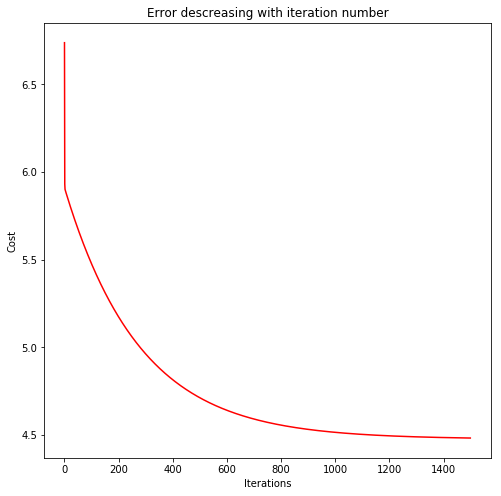

In [618]:
fig, ax = plt.subplots(figsize=(8, 8))
#arange returns evenly spaced values within a given interval, in this case iters, 1500.
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error descreasing with iteration number')

To help give better intuition about descending the gradient of the cost function and arriving at a minimum, you can take a look at the contour and 3d plot of our cost function below. The red dot in contour plot on the left is values of theta (our parameters) that our implementation of gradient descent arrived at, pretty close to the absolute minimum, but not quite.

The 3d plot is a visualization of our cost function. What gradient descent attempts to do is walk down the "hills" on either side of that convex function and find the lowest point in the "valley" possible. It does this by manipulating the values of theta.

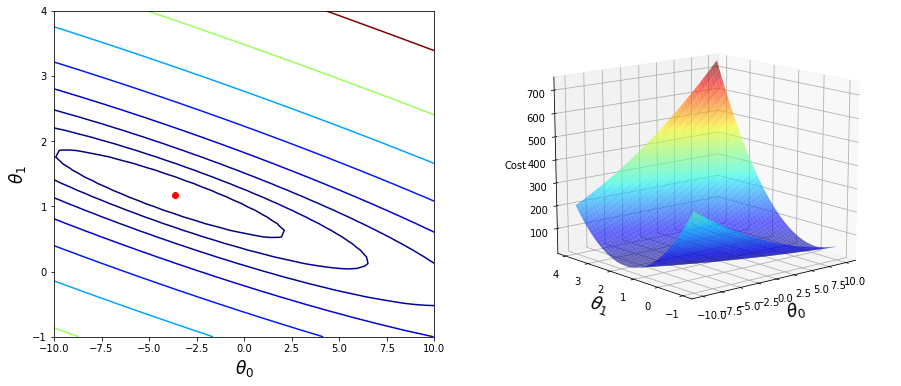

In [598]:
'''
This cell of code was adapted from https://github.com/JWarmenhoven/Coursera-Machine-Learning, a master of data visualization.
'''
from mpl_toolkits.mplot3d import axes3d

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = computeCost(X, y, theta=[[xx[i, j]], [yy[i, j]]])

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Contour plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(new_theta[0], new_theta[1], c='r')

# 3d plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(), Z.max())
ax2.view_init(elev=15, azim=230)

# labeling thetas which is the same for both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

## Linear regression with multiple variables

Now Andrew Ng has demanded we implement linear regression with multiple variables, also know as multivariate linear regression, which we will use to predict the prices of houses, Andrew Ng's favorite example. Andrew Ng says: Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In this repo, the file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. So if you've been paying attention, dear reader, our new X matrix will be the first two columns and our new y vector will be the last column because we want to use bedroom number and house size to try and predict house price.

Let's take a look at this new data set as well.

In [599]:
######################################
#MULTIVARIATE lINEAR REGRESSION
######################################

In [600]:
#this code assumes the text file is in the same directory as the code file
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


uh oh... that's a problem. As you can see, our data take on very different values. What that means is that if we try to use gradient descent, it will take a very long time to converge because the variables in our data are on such different scales.

What we can do to overcome this issue is something called mean normalization. What mean normalizaton does is subtract every data point from the mean of all data points of that same class and then divide that by that data class' standard deviation. Sounds hard right? Have no fear; pandas and numpy make it very easy! One note though: mean normalization should be done before inserting the column of ones for our bias or intercept term. 

In [601]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head(), data2.shape

(       Size  Bedrooms     Price
 0  0.130010 -0.223675  0.475747
 1 -0.504190 -0.223675 -0.084074
 2  0.502476 -0.223675  0.228626
 3 -0.735723 -1.537767 -0.867025
 4  1.257476  1.090417  1.595389, (47, 3))

An additional note: trying to use this code before doing mean normalization will result in a crash because of numpy's value flooding.



We can again use numpy to do all that same stuff. There's always more than one way to skin a cat.

In [602]:
np_data2 = np.loadtxt('ex1data2.txt', delimiter=',')
np_data2, np_data2.shape

(array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
        [1.60000e+03, 3.00000e+00, 3.29900e+05],
        [2.40000e+03, 3.00000e+00, 3.69000e+05],
        [1.41600e+03, 2.00000e+00, 2.32000e+05],
        [3.00000e+03, 4.00000e+00, 5.39900e+05],
        [1.98500e+03, 4.00000e+00, 2.99900e+05],
        [1.53400e+03, 3.00000e+00, 3.14900e+05],
        [1.42700e+03, 3.00000e+00, 1.98999e+05],
        [1.38000e+03, 3.00000e+00, 2.12000e+05],
        [1.49400e+03, 3.00000e+00, 2.42500e+05],
        [1.94000e+03, 4.00000e+00, 2.39999e+05],
        [2.00000e+03, 3.00000e+00, 3.47000e+05],
        [1.89000e+03, 3.00000e+00, 3.29999e+05],
        [4.47800e+03, 5.00000e+00, 6.99900e+05],
        [1.26800e+03, 3.00000e+00, 2.59900e+05],
        [2.30000e+03, 4.00000e+00, 4.49900e+05],
        [1.32000e+03, 2.00000e+00, 2.99900e+05],
        [1.23600e+03, 3.00000e+00, 1.99900e+05],
        [2.60900e+03, 4.00000e+00, 4.99998e+05],
        [3.03100e+03, 4.00000e+00, 5.99000e+05],
        [1.76700e+03

In [603]:
np_data2 = (np_data2 - np.mean(np_data2)) / np.std(np_data2)
np_data2, np_data2.shape

(array([[-0.63940029, -0.65139103,  1.63088354],
        [-0.6422767 , -0.65139103,  1.23138262],
        [-0.63771097, -0.65139103,  1.45453242],
        [-0.64332681, -0.65139673,  0.67265204],
        [-0.63428668, -0.65138532,  2.42988537],
        [-0.64007944, -0.65138532,  1.06016794],
        [-0.64265337, -0.65139103,  1.14577528],
        [-0.64326404, -0.65139103,  0.48431019],
        [-0.64353227, -0.65139103,  0.55850892],
        [-0.64288166, -0.65139103,  0.73257718],
        [-0.64033626, -0.65138532,  0.71830358],
        [-0.63999384, -0.65139103,  1.32897498],
        [-0.64062162, -0.65139103,  1.23194762],
        [-0.6258515 , -0.65137961,  3.34303033],
        [-0.64417147, -0.65139103,  0.8318817 ],
        [-0.63828169, -0.65138532,  1.91624134],
        [-0.6438747 , -0.65139673,  1.06016794],
        [-0.6443541 , -0.65139103,  0.48945234],
        [-0.63651818, -0.65138532,  2.20215844],
        [-0.63410976, -0.65138532,  2.76717829],
        [-0.6413236 

In [604]:
#insert column of ones for the bias or intercept term
np_data2 = np.c_[np.ones((np_data2.shape[0],1)), np_data2]
np_data2.shape

(47, 4)

In [605]:
#set up X2 and y2
X2 = np.c_[ np_data2[:, 0:3]]
y2 = np.c_[np_data2[:,3]]
X2.shape, y2.shape

((47, 3), (47, 1))

In [606]:
X2

array([[ 1.        , -0.63940029, -0.65139103],
       [ 1.        , -0.6422767 , -0.65139103],
       [ 1.        , -0.63771097, -0.65139103],
       [ 1.        , -0.64332681, -0.65139673],
       [ 1.        , -0.63428668, -0.65138532],
       [ 1.        , -0.64007944, -0.65138532],
       [ 1.        , -0.64265337, -0.65139103],
       [ 1.        , -0.64326404, -0.65139103],
       [ 1.        , -0.64353227, -0.65139103],
       [ 1.        , -0.64288166, -0.65139103],
       [ 1.        , -0.64033626, -0.65138532],
       [ 1.        , -0.63999384, -0.65139103],
       [ 1.        , -0.64062162, -0.65139103],
       [ 1.        , -0.6258515 , -0.65137961],
       [ 1.        , -0.64417147, -0.65139103],
       [ 1.        , -0.63828169, -0.65138532],
       [ 1.        , -0.6438747 , -0.65139673],
       [ 1.        , -0.6443541 , -0.65139103],
       [ 1.        , -0.63651818, -0.65138532],
       [ 1.        , -0.63410976, -0.65138532],
       [ 1.        , -0.6413236 , -0.651

In [607]:
y2

array([[1.63088354],
       [1.23138262],
       [1.45453242],
       [0.67265204],
       [2.42988537],
       [1.06016794],
       [1.14577528],
       [0.48431019],
       [0.55850892],
       [0.73257718],
       [0.71830358],
       [1.32897498],
       [1.23194762],
       [3.34303033],
       [0.8318817 ],
       [1.91624134],
       [1.06016794],
       [0.48945234],
       [2.20215844],
       [2.76717829],
       [0.7919316 ],
       [0.80391663],
       [0.73486004],
       [0.8318817 ],
       [2.62392868],
       [0.77481014],
       [1.99956581],
       [2.02524801],
       [2.05949095],
       [1.06016794],
       [1.34552574],
       [0.31823766],
       [1.14577528],
       [2.65817161],
       [0.98026775],
       [0.77481014],
       [0.66066702],
       [1.31756067],
       [2.48182049],
       [0.98654562],
       [1.45167884],
       [1.23138262],
       [1.14063884],
       [1.0550315 ],
       [0.37530922],
       [1.06016794],
       [0.71545571]])

So, what do we need to do adapt our algorithm to deal with the increased dimensionality of our data? Nothing! Because we implemented a fully automatic, dynamic, and vectorized implementation of linear regression with gradient descent, all we need to do is pass our functions our new X2 matrix and y2 vector and watch our model work its magic!

In [608]:
# perform linear regression on the new data set
new_theta2, cost2 = gradientDescent(X2, y2, alpha, iters)

# get the cost (or the loss or the error) of the model
computeCost(X2, y2, new_theta2)

0.25034752067521343

In [609]:
new_theta2, new_theta2.shape

(array([[ 0.71788451],
        [-0.41868656],
        [-0.46760264]]), (3, 1))

Let's see how the cost function decreased on the new data set.

Text(0.5,1,'Error decreasing with training on new training set')

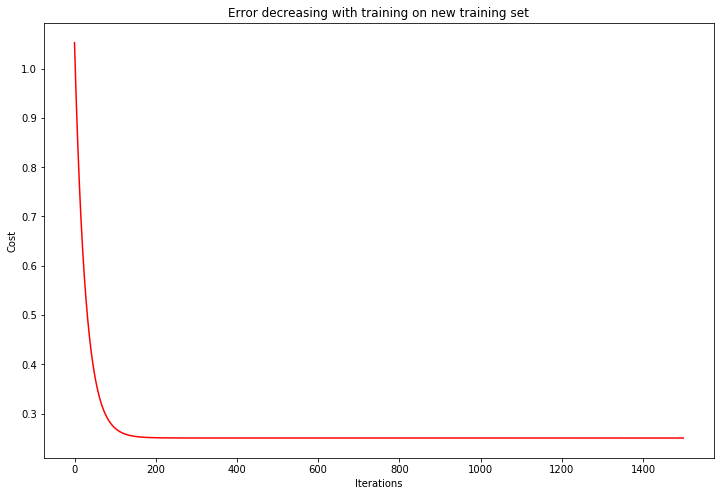

In [610]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error decreasing with training on new training set')

Unfortunately, owing to the fact that the new data is of greater dimensionality and because humans can only visualize in 3 dimensions, I can't draw any other pretty pictures of the new training set to show you, dear reader. However, I hope you are statisfied with this implementation of linear regression with gradient descent. 

As mentioned above, gradient descent is an iterative algorithm, so it looks at the data many times to provide a solution. There is an alternative to gradient descent which uses an analytic solution to find the optimized values of theta without any iteration at all. This solution is called the normal equation and it comes from setting the partial derivatives equal to zero and solving for theta with a bunch of math. The detailed derivation can be found page 11 of cs229-notes1.pdf in this repo. It's quite mathy, so I won't go into detail here, but the solution is obtained as:

#### Normal equation solution
$$ \theta = (X^TX)^{-1} X^Ty $$

where X is a matrix and y is a vector.

Just gotta code it up!

In [622]:
#no need for mean normalization with normal equation. resetting variables.
np_data2 = np.loadtxt('ex1data2.txt', delimiter=',')
np_data2 = np.c_[np.ones((np_data2.shape[0],1)), np_data2]
X2 = np.c_[ np_data2[:, 0:3]]
y2 = np.c_[np_data2[:,3]]

In [626]:
# inv means inverse (raising something to the -1)
from numpy.linalg import inv
#Using the normal equation, an analytic, rather than iterative, solution to the linear regression optimization problem
def normalEquation(X, y):
    
    first = (inv(np.dot(X.T, X)))
    
    second = np.dot(X.T, y)
    
    return np.dot(first, second).T


Using the normal equation we can now answer the question: if a house has 1650 square feet and 3 bedrooms, how much will it cost?

In [627]:
# the one is the bias term
theta = [[1], [1650], [3]]
print("$%0.2f" % float(np.dot(normalEquation(X2, y2), theta)))

$293081.46


And we're done. Thank you for reading, dear reader!